# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# For label encoding
from sklearn.preprocessing import LabelEncoder

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [3]:
# loading data
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
  data = pd.read_csv(filename)

Saving used_device_data.csv to used_device_data.csv


## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [4]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [5]:
data.shape

(3454, 15)

### Checking the data types of the columns for the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

*   Most of there columns are float64. There are two int64 columns and four object columns.
*   The two main columns, brand_name and os are objects.

### Statistical summary of the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


*   The top brand is Others and the top OS is Android.
*   Most of the screen sizes are between 12-14.


*   Most of the phones have at least 4g but there are 1,119 thare are not so I will check to see if those are missing inputs.
*   Main camera mp, selfie camera mp, int memory, ram, battery, and weight appear to have some missing numbers.

### Checking for duplicate values

In [8]:
data.duplicated().sum()

0

*   There are no duplicate values.

### Checking for missing values

In [9]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

*   Main camera mp has 179 missing values.
*   Five other columns have minimal missing values.

In [10]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### normalized_used_price

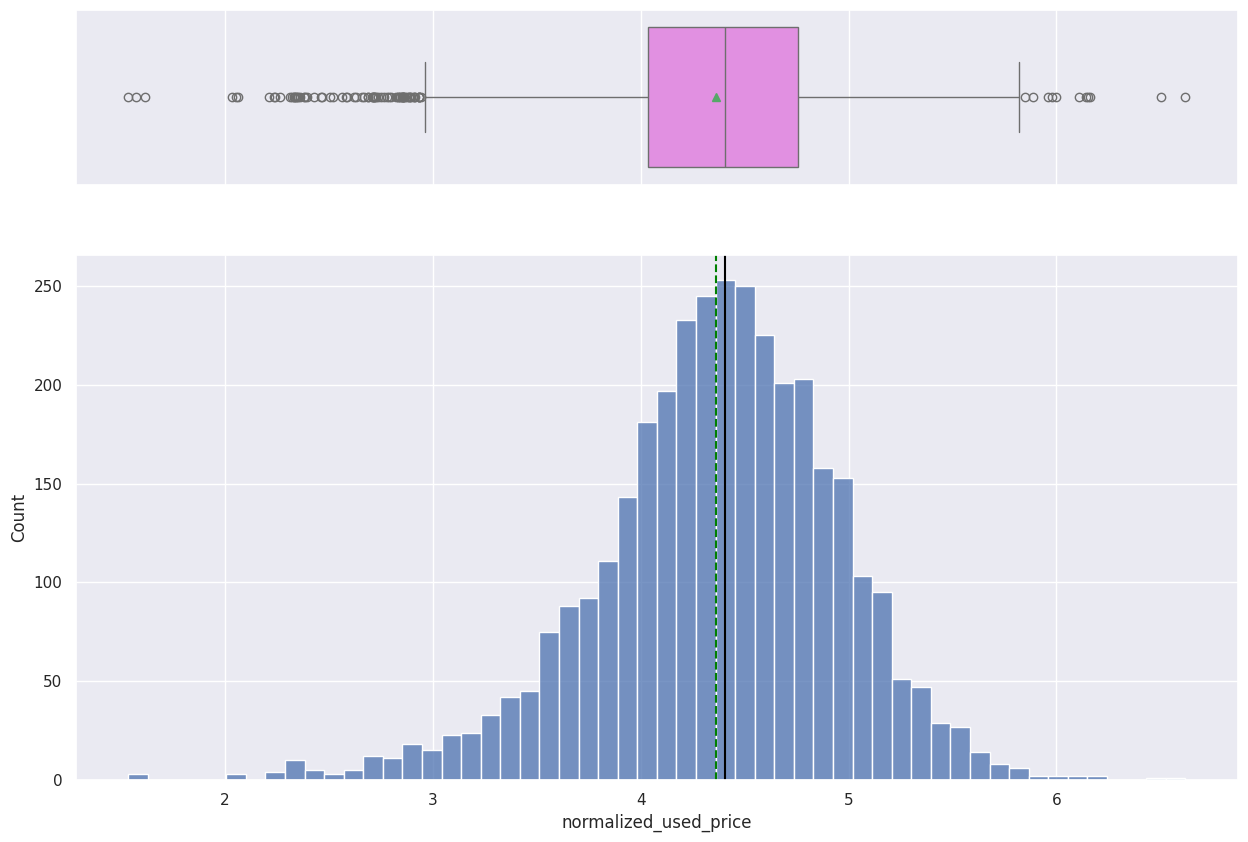

In [13]:
histogram_boxplot(df, "normalized_used_price")



*   The distrobution of normalized_used_price is close to a normal dostrobution but is left-skewed with quite a few outliers.
*   The average price is around 4.45



### normalized_new_price

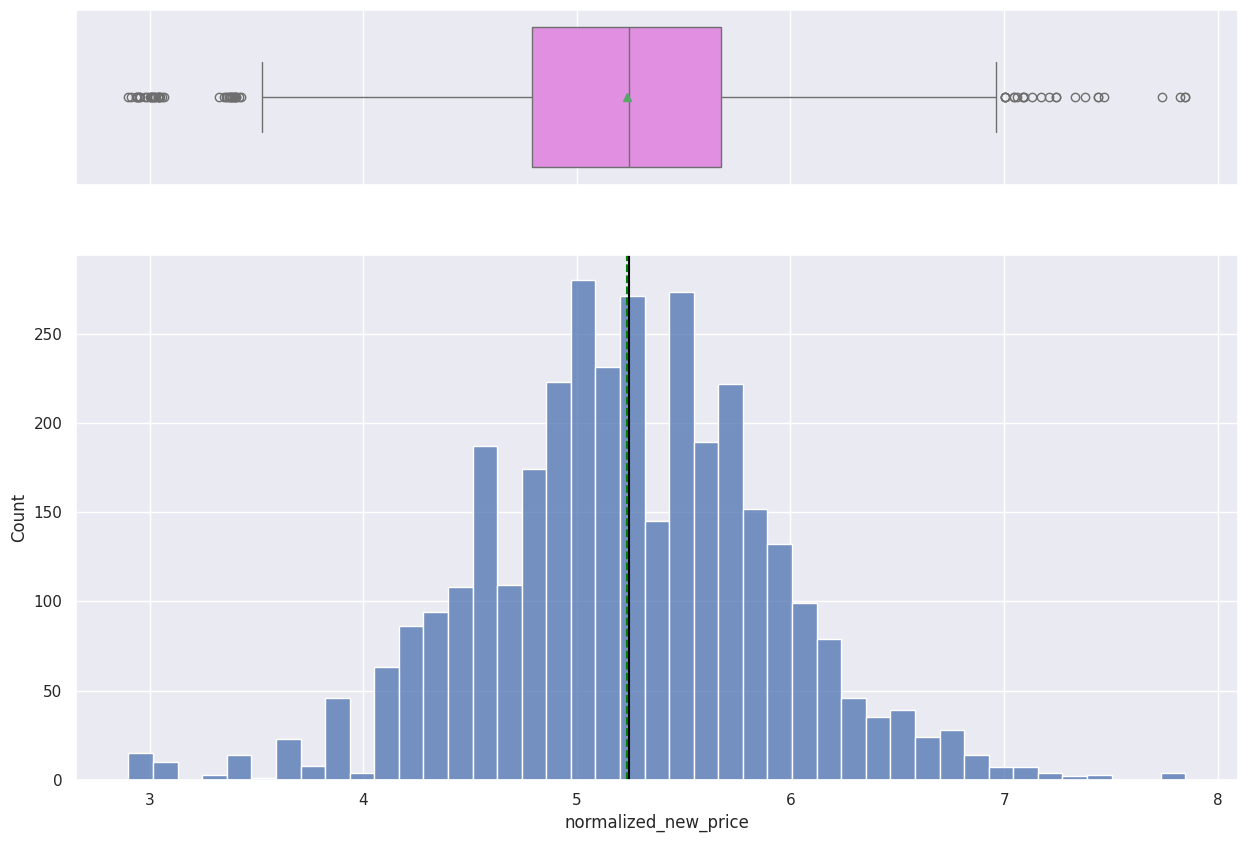

In [14]:
histogram_boxplot(df, "normalized_new_price")



*   The distrobution of normalized_new_price is somewhat a normal distrobution.
*   The median price is around 5.25



### screen_size

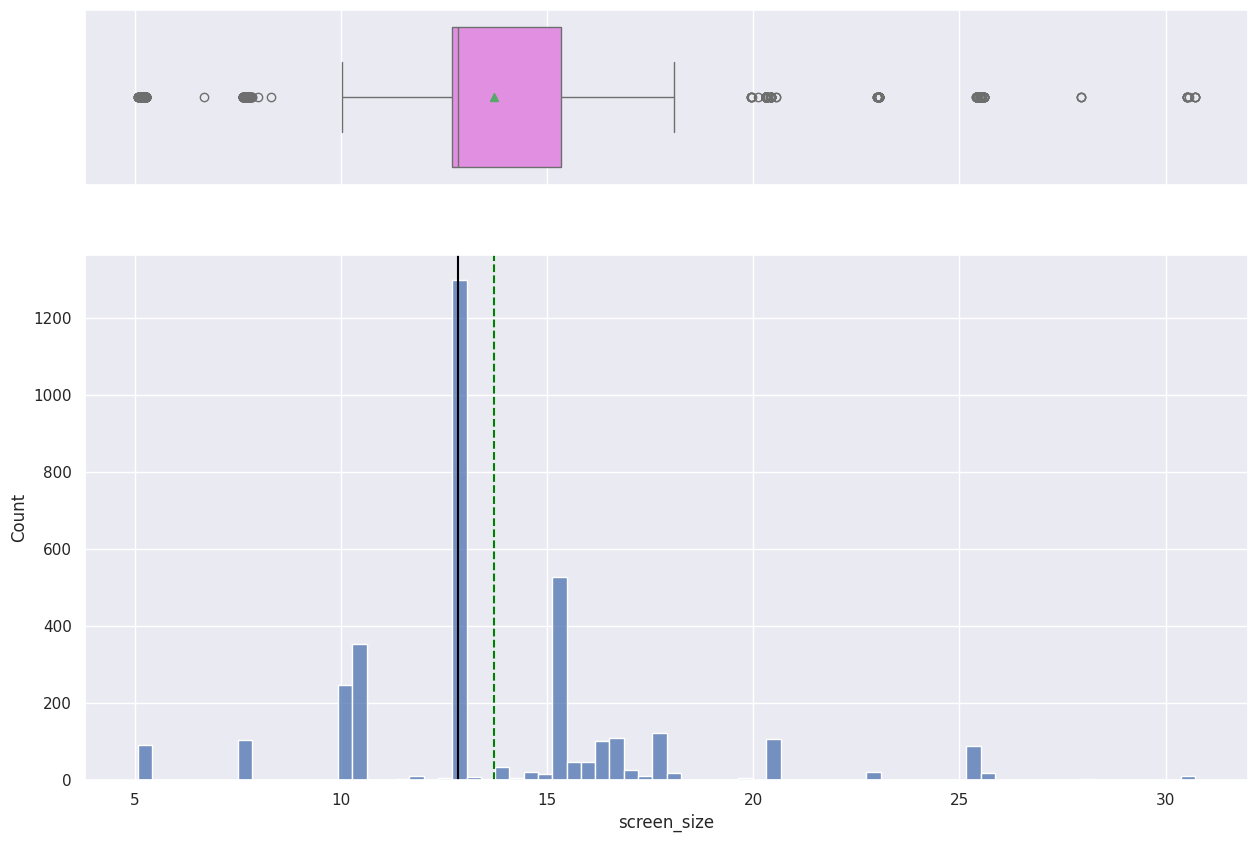

In [15]:
histogram_boxplot(df, "screen_size")



*   The distrobution of screen_size is all over the place.
*   The median size is around 14.



### main_camera_mp

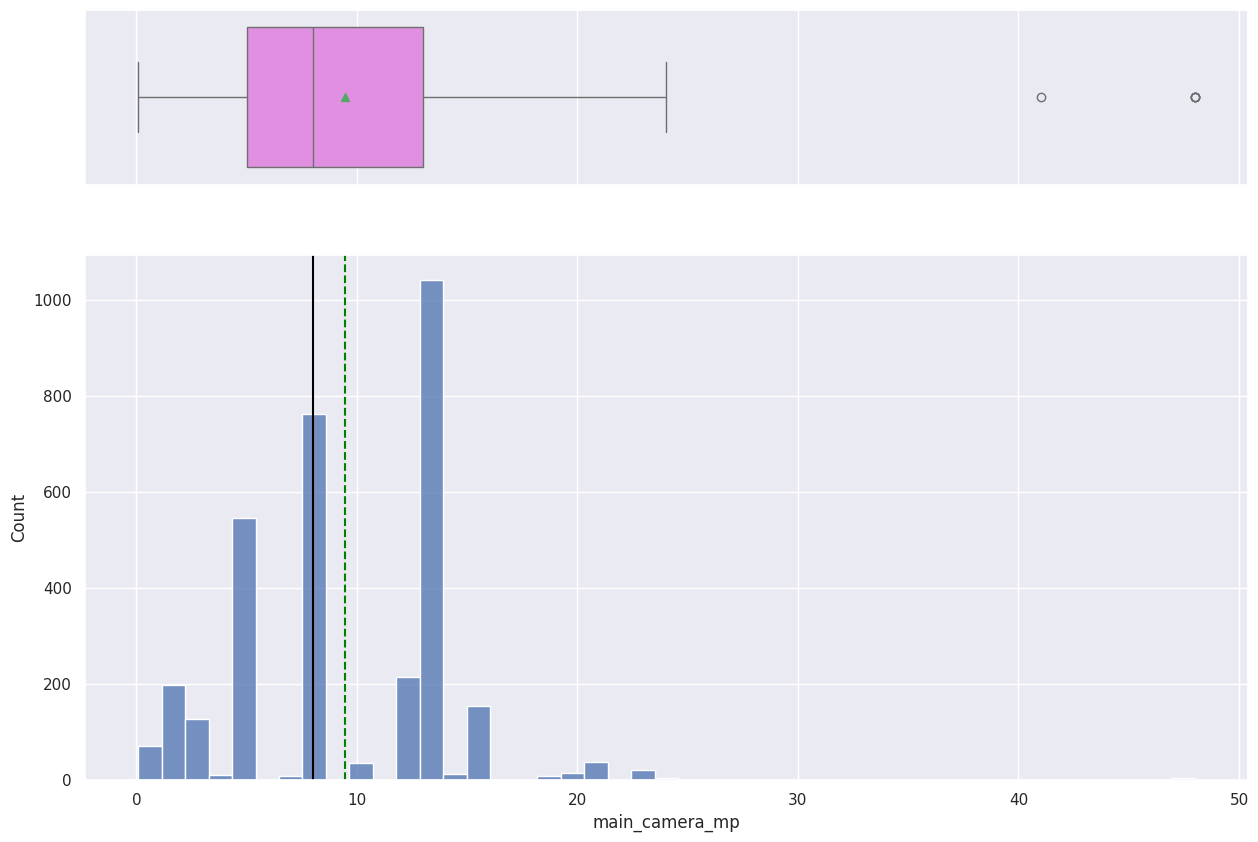

In [16]:
histogram_boxplot(df, "main_camera_mp")



*   The distrobution of main_camera_mp is heavily right-skewed.



### selfie_camera_mp

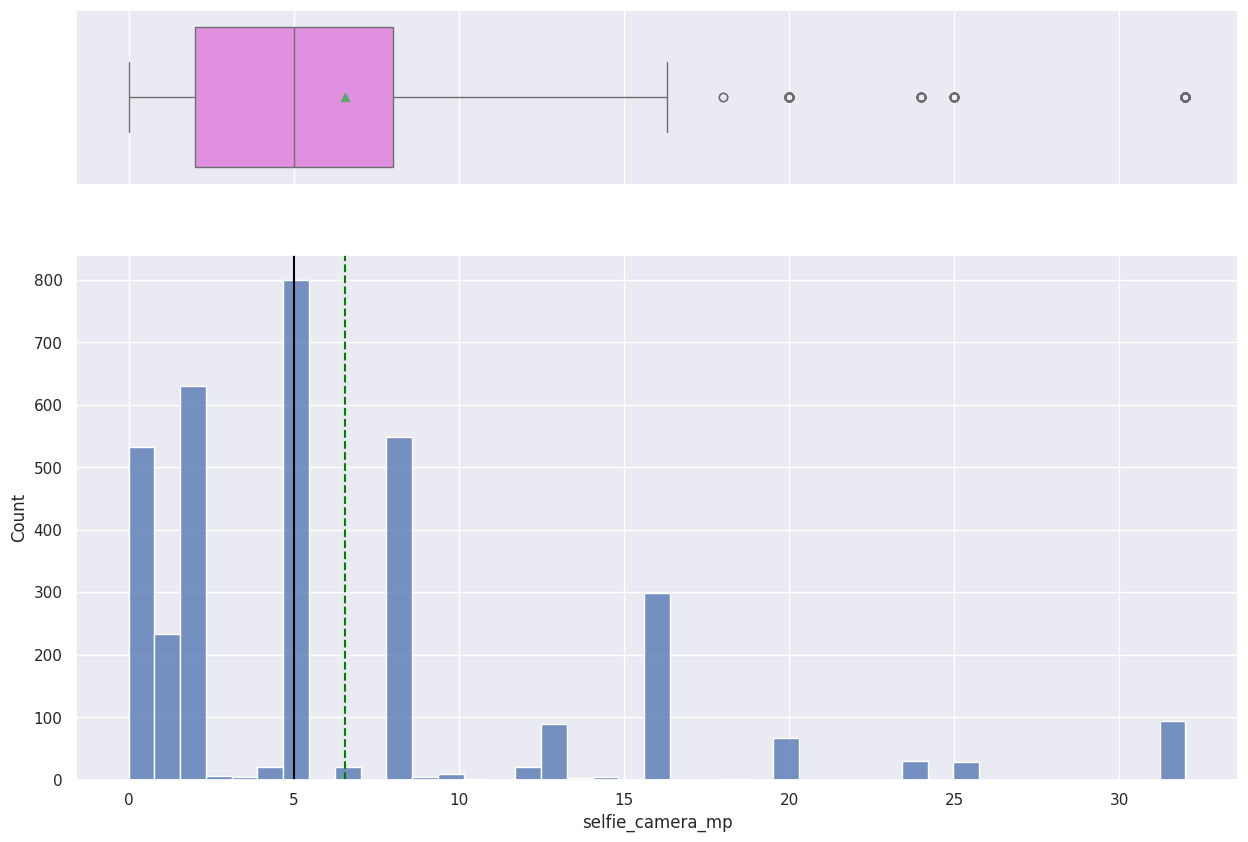

In [17]:
histogram_boxplot(df, "selfie_camera_mp")



*   The distrobution of selfie_camera_mp is also heavily right-skewed.



### int_memory

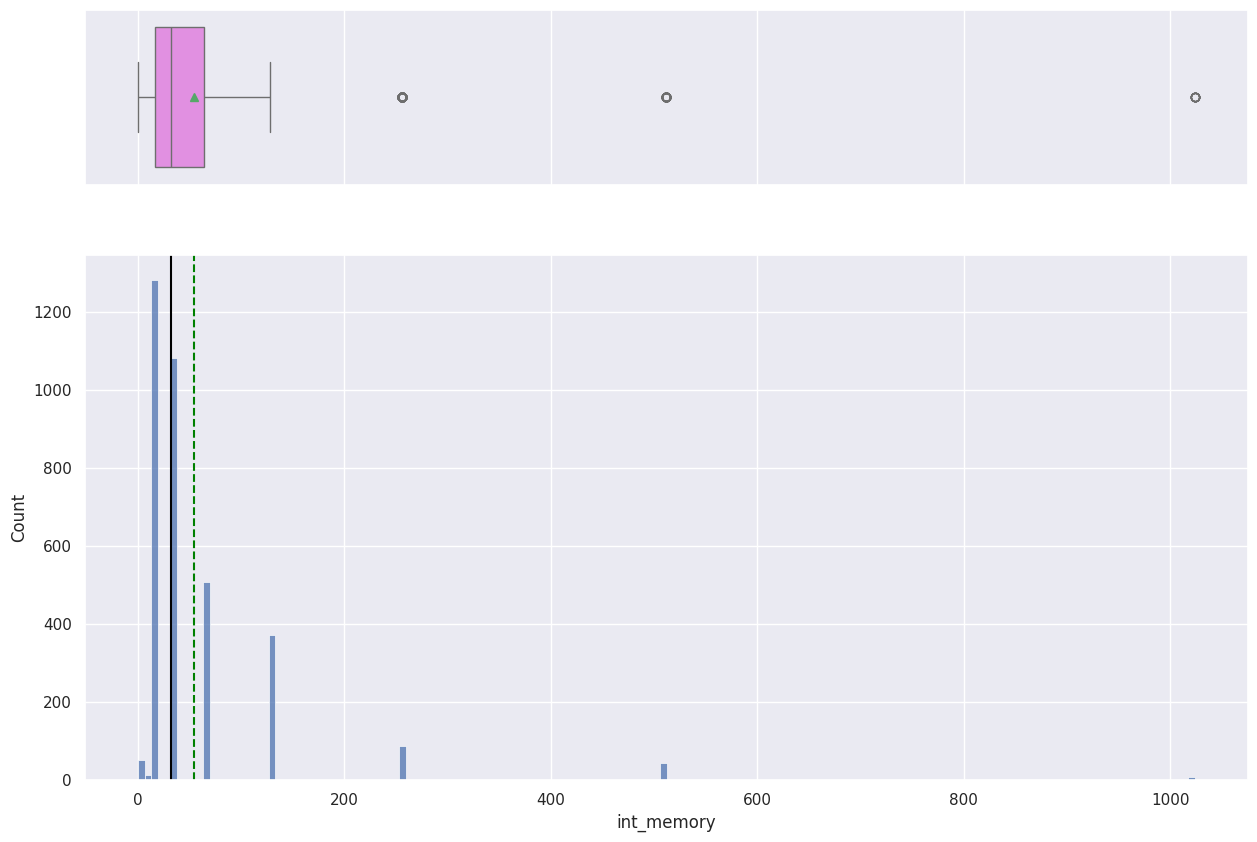

In [18]:
histogram_boxplot(df, "int_memory")



*   The distrobution of int_memory is very heavily right-skewed with just a couple outliers.



### ram

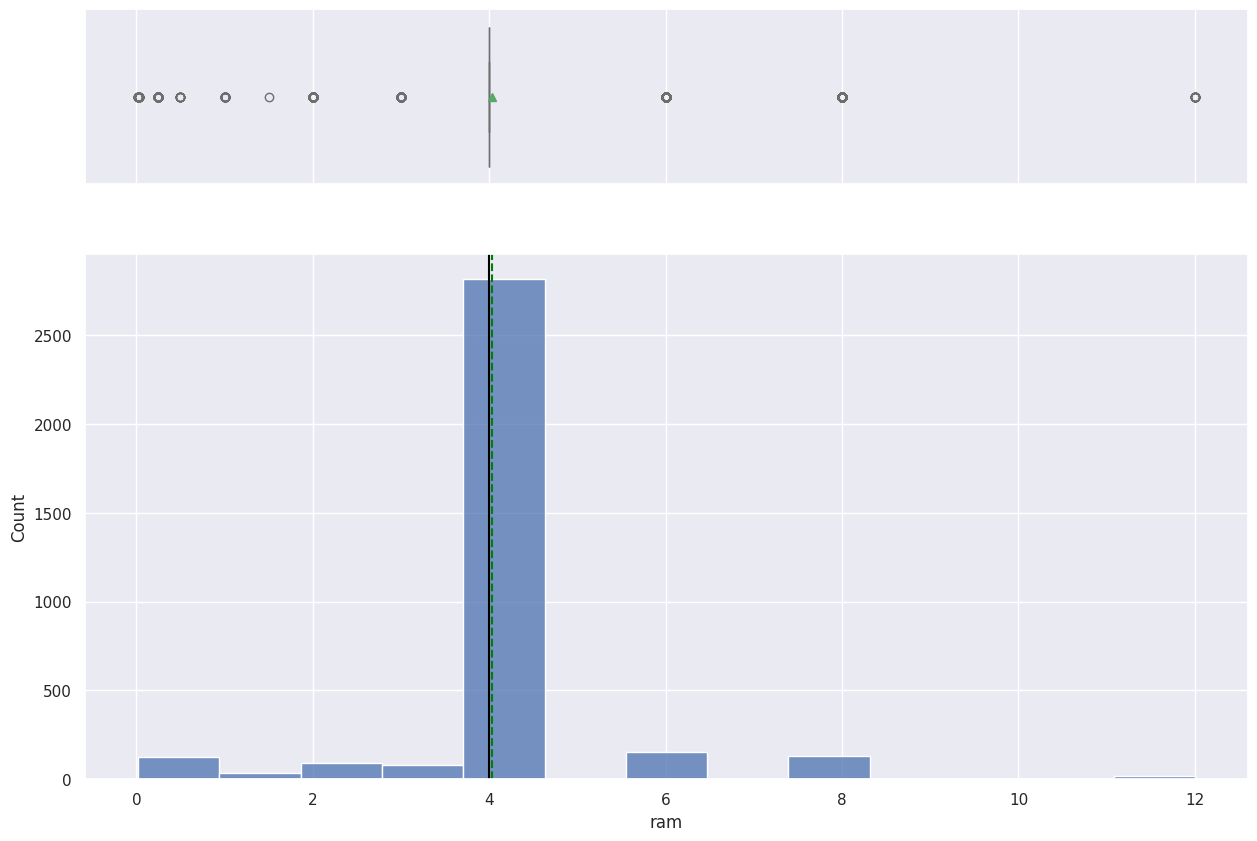

In [19]:
histogram_boxplot(df, "ram")



*   The vast majority of the phones have a ram of 4.



### weight

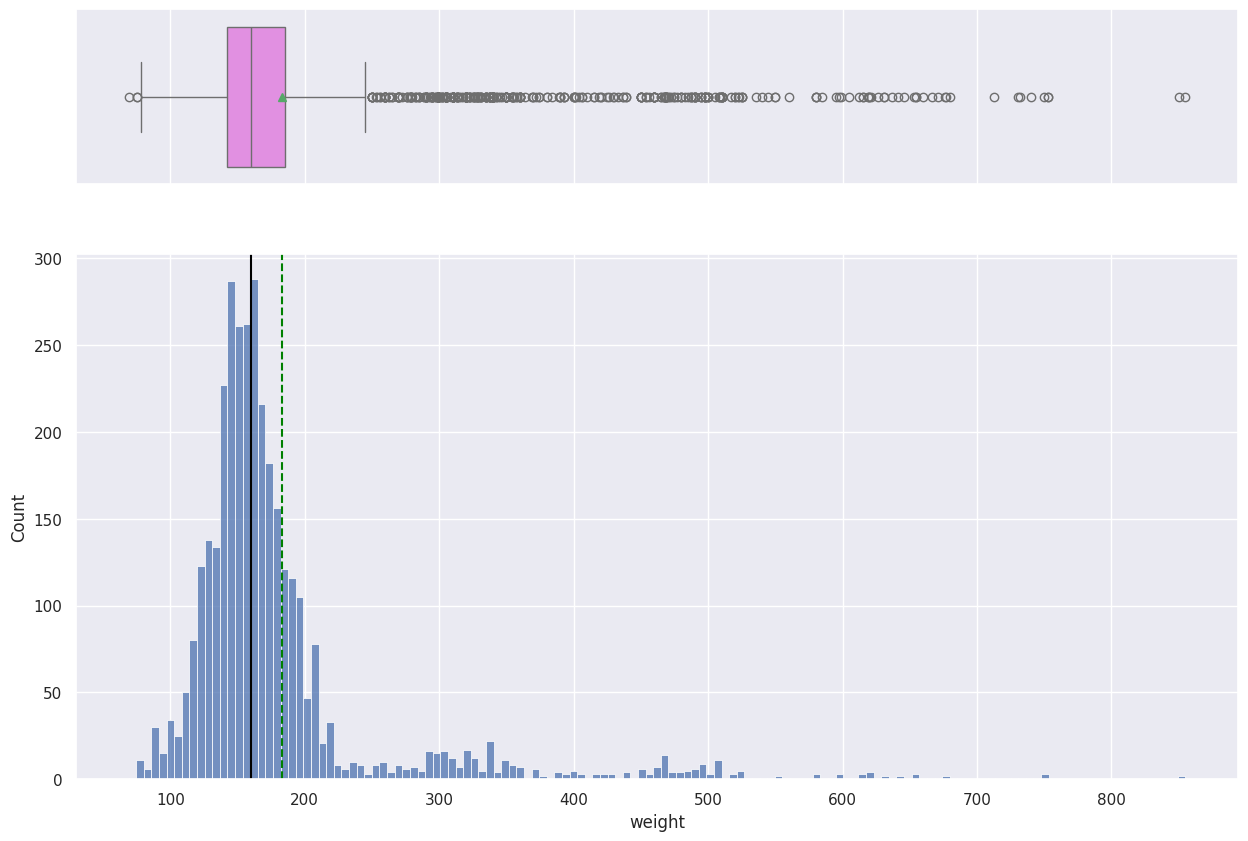

In [20]:
histogram_boxplot(df, "weight")



*   The distrobution of weight is close to normal but is heavily right-skewed.


*   The median weight is around 180.





### battery

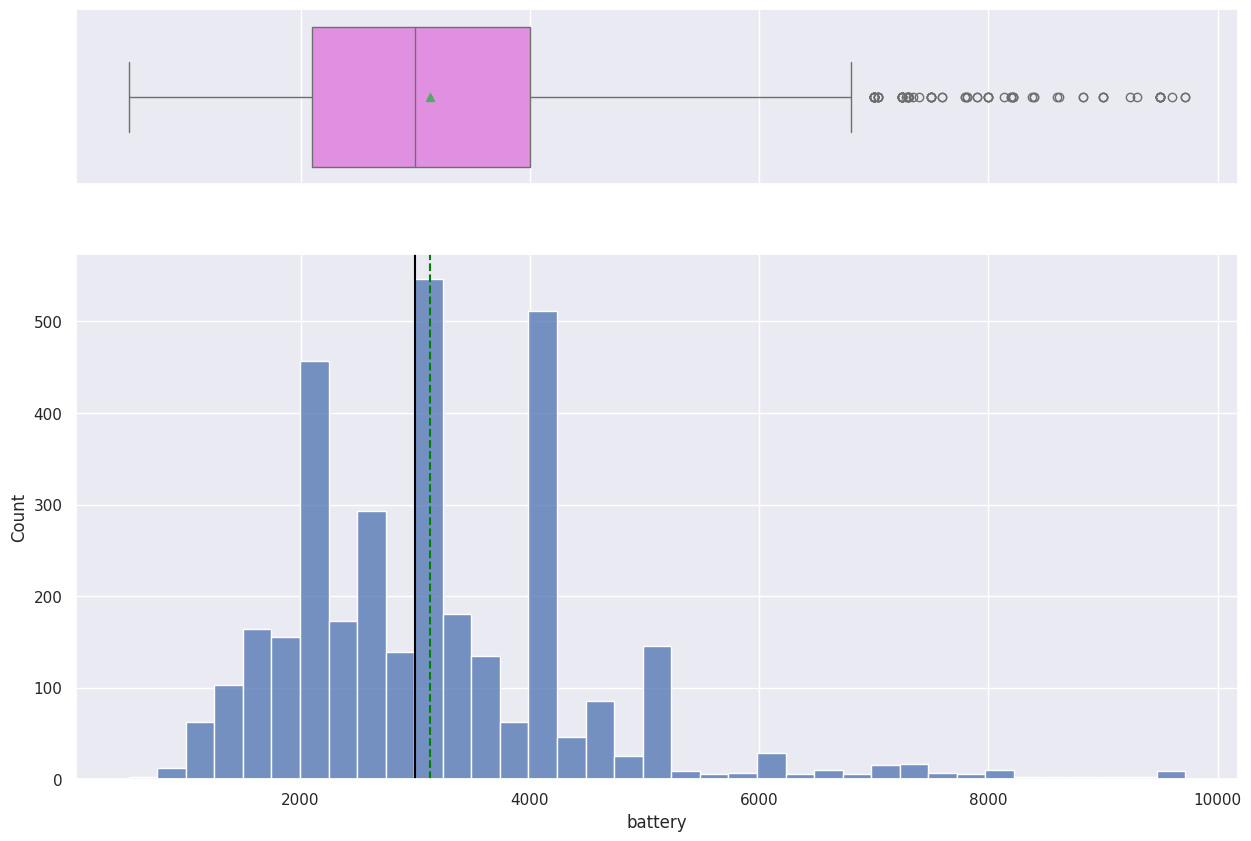

In [21]:
histogram_boxplot(df, "battery")



*   The battery is right-skewed with a lot of outliers.
*   The distrobution of battery is right-skewed.



### days_used

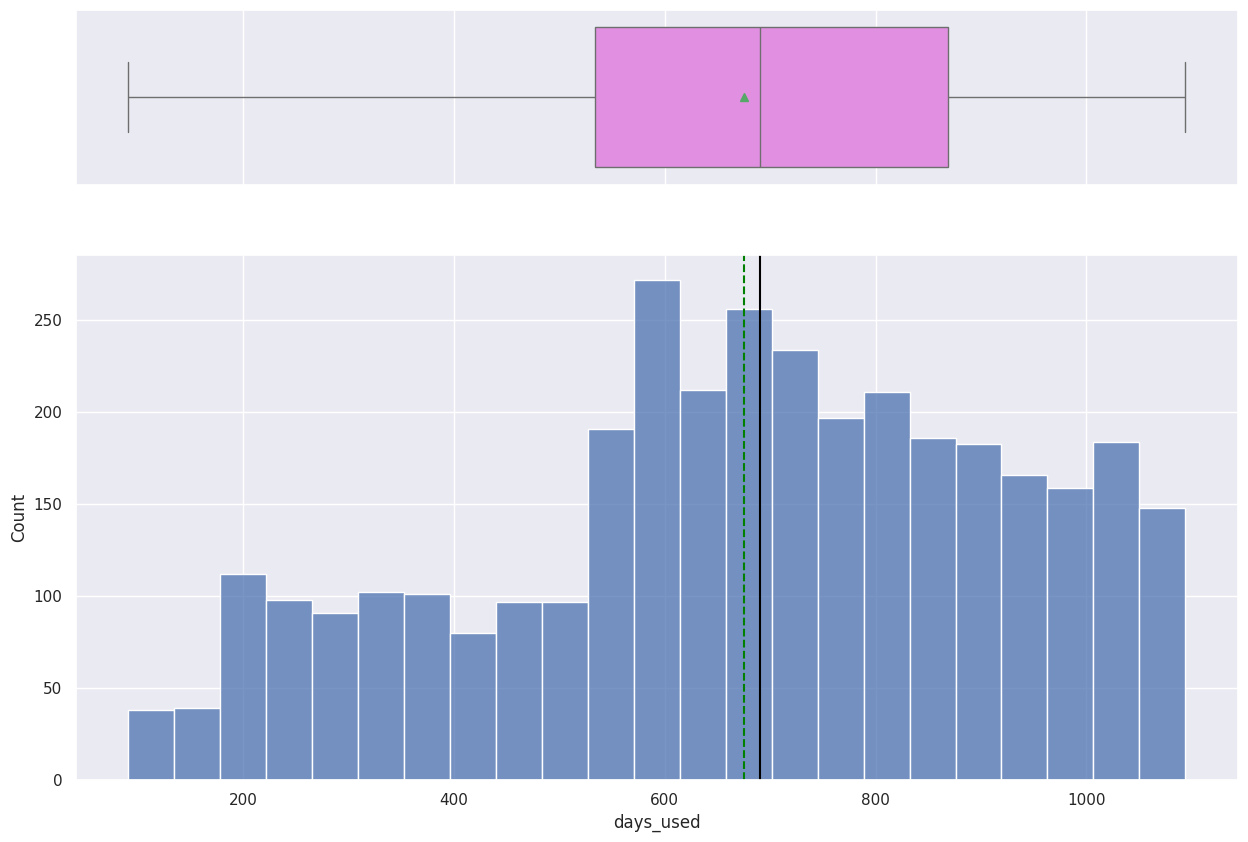

In [22]:
histogram_boxplot(df, "days_used")



*   The distrobution of days_used is more flat than normal and is left-skewed.
*   The median is around 680.



### brand_name

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


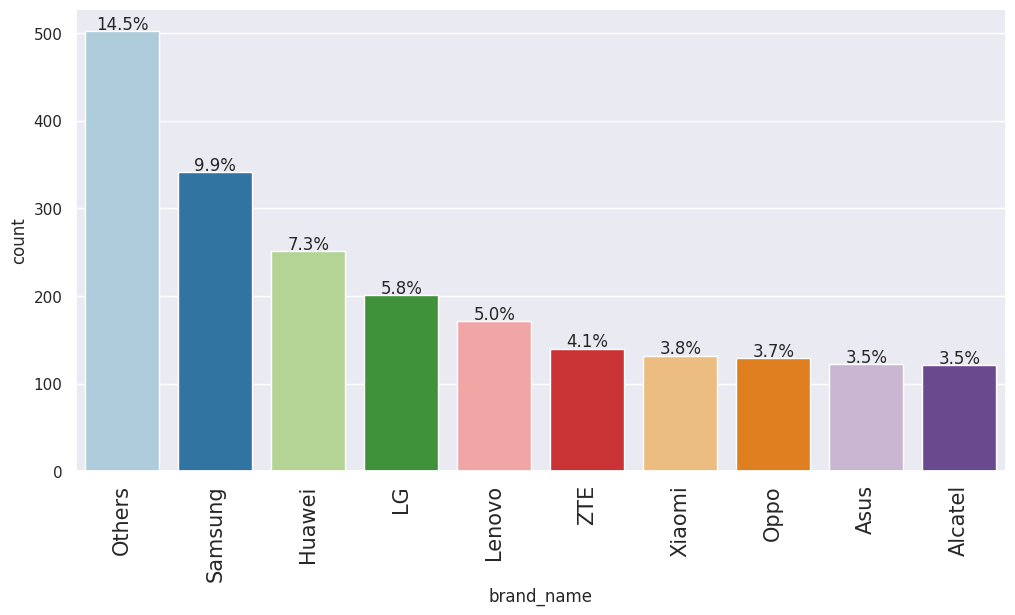

In [23]:
labeled_barplot(df, "brand_name", perc=True, n=10)



*   The majority of the phones have a brand_name of "Others".
*   Samsung, Huawei, LG, and Lenovo are between 10% and 5%. The rest are at or below 4.1%.





### os

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


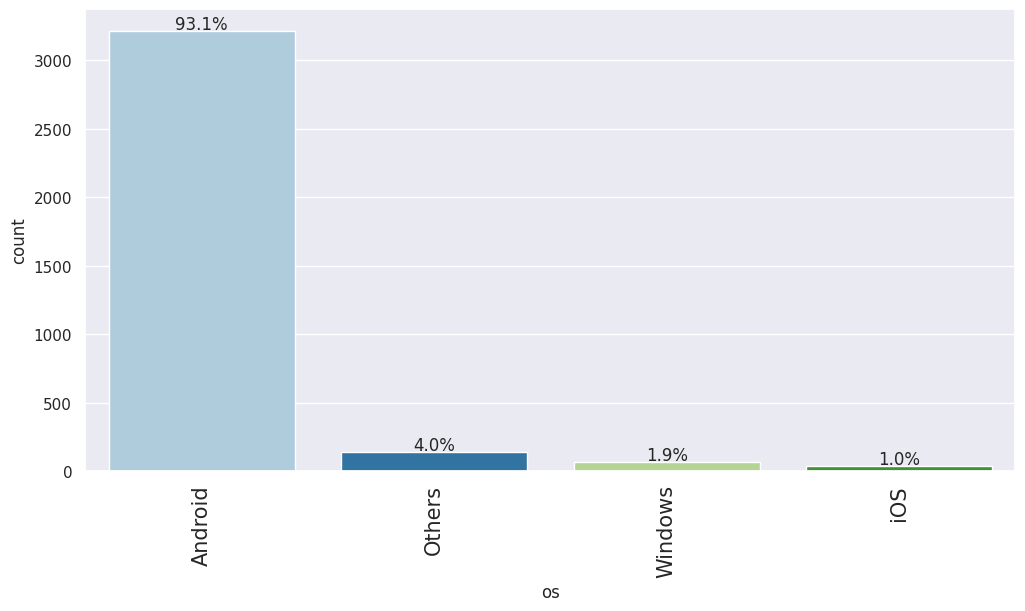

In [24]:
labeled_barplot(df, "os", perc=True, n=10)



*   The most common OS is by far Android with 93.1% distrobution.
*   All others are less than 5%.



### 4g

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


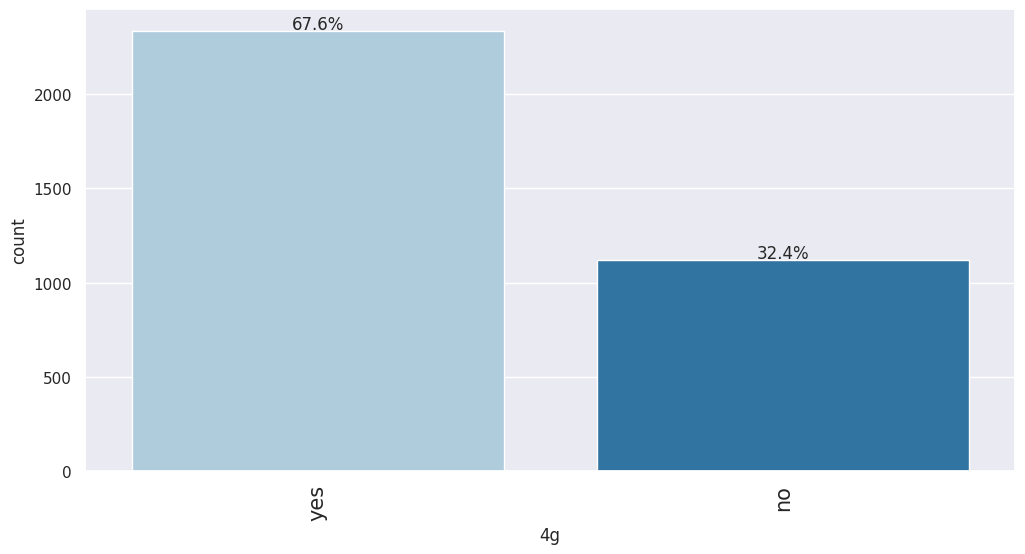

In [25]:
labeled_barplot(df, "4g", perc=True, n=10)



*   67.6% of the phones have 4g.



### 5g

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


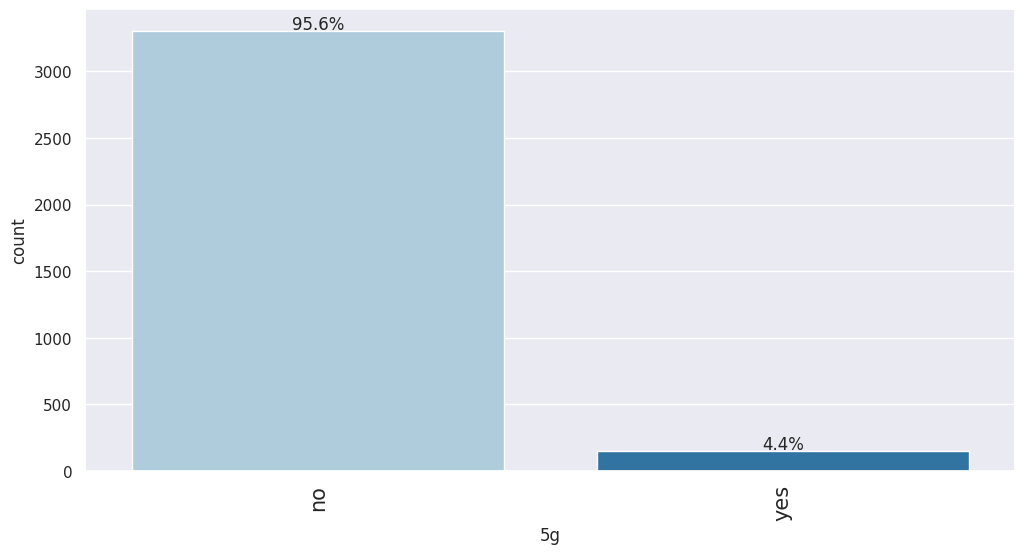

In [26]:
labeled_barplot(df, "5g", perc=True, n=10)



*   Only 4.4% of the phones have 5g.



### release_year

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


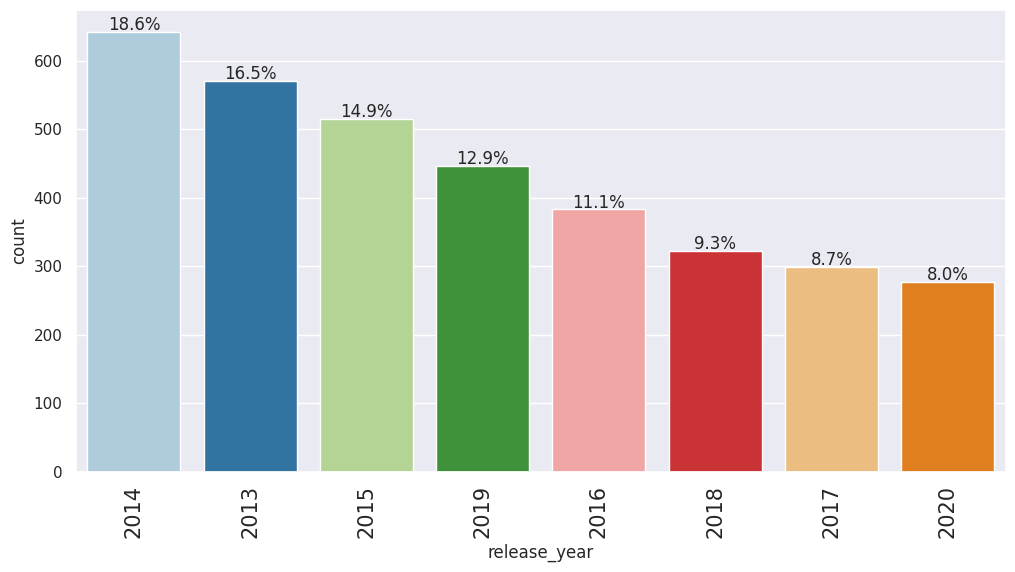

In [27]:
labeled_barplot(df, "release_year", perc=True, n=10)



*   Phones that were released in 2014 make up 18.6% of the phones. It steadily declines from there, which is expected given the context.



## Bivariate Analysis

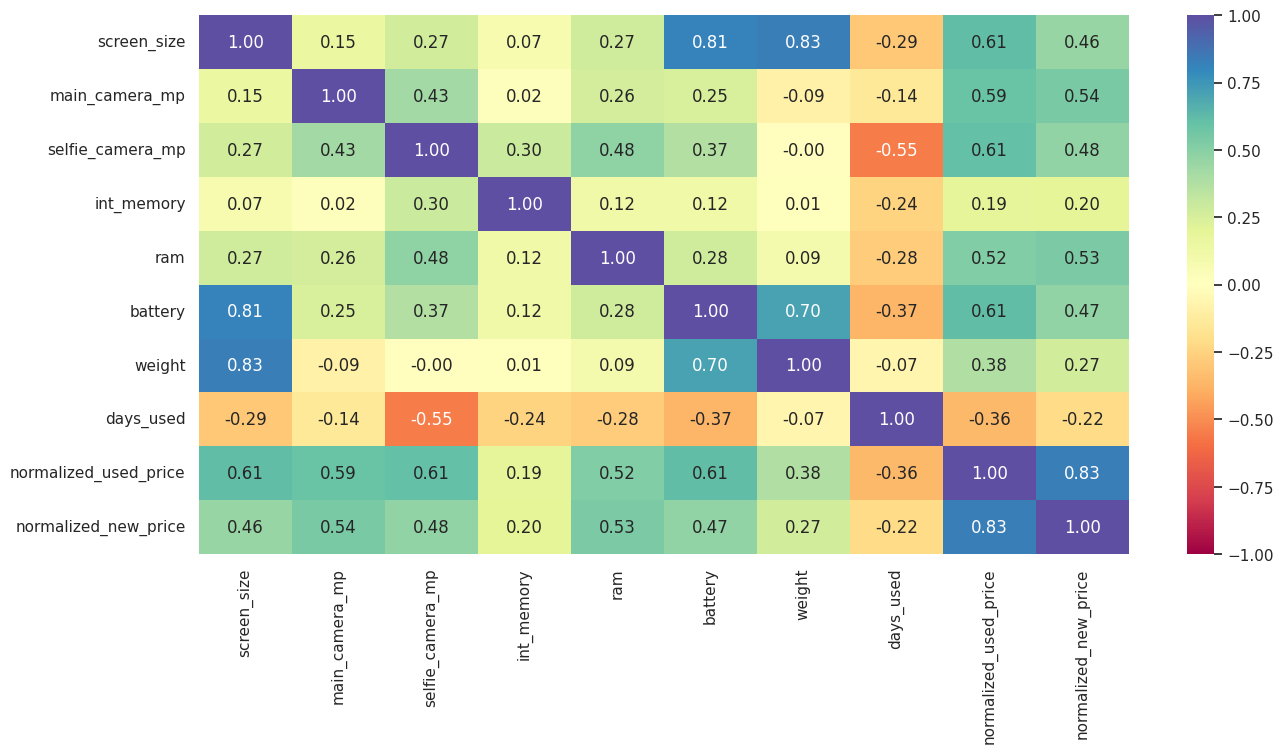

In [28]:
# Lets look at the correlation excluding release_year
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   Battery, weight and screen size have a strong correlation.
*   Screen size has the highest correlation with normalized used price.


*   The second highest correlation with normalized used price is selfie camera mp.
*   The third highest correlation with normalized used price is main camera mp.





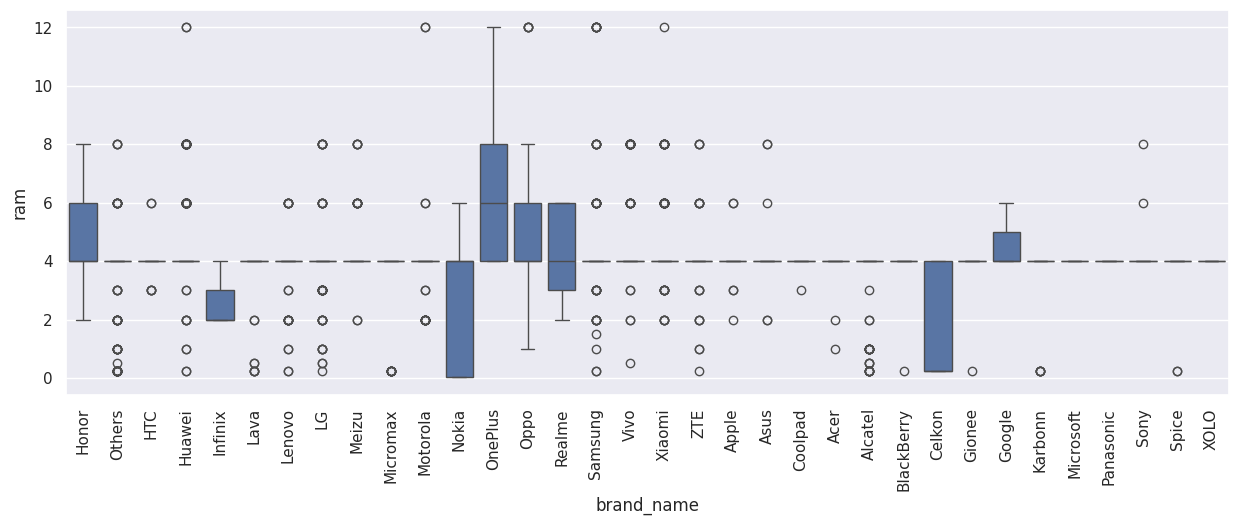

In [29]:
# RAM by brand
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()



*   The brand, OnePlus has the highest average ram.
*   The brand, Celkon has the lowest average ram.


*   The rest of brands have ram around the average.





In [30]:
# brand_name and larger battery ie. weight
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

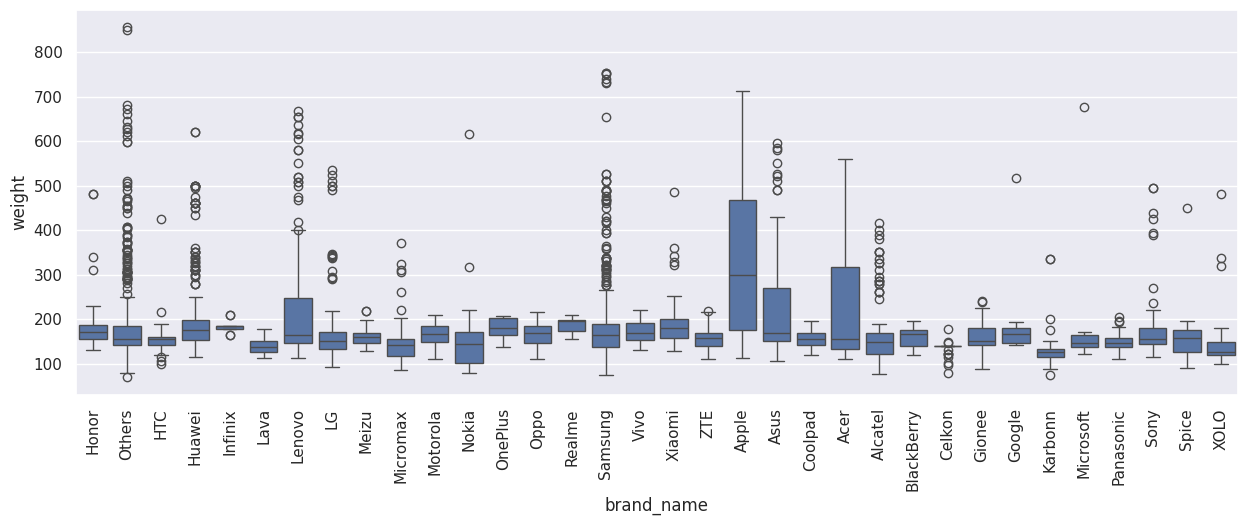

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()



*   With the exception of Apple and outliers for many of the other brands, most of the phones weight are close to the average.



In [33]:
# brand_name with larger screens
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


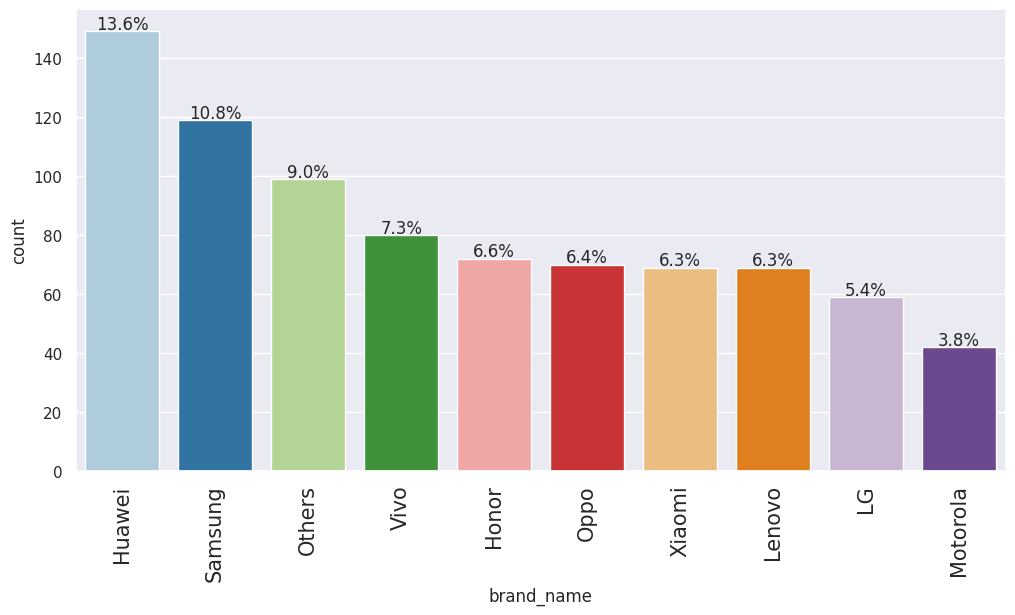

In [34]:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10)



*   Huawei and Samsung have the most large screen phones.



In [35]:
# selfie_camera
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


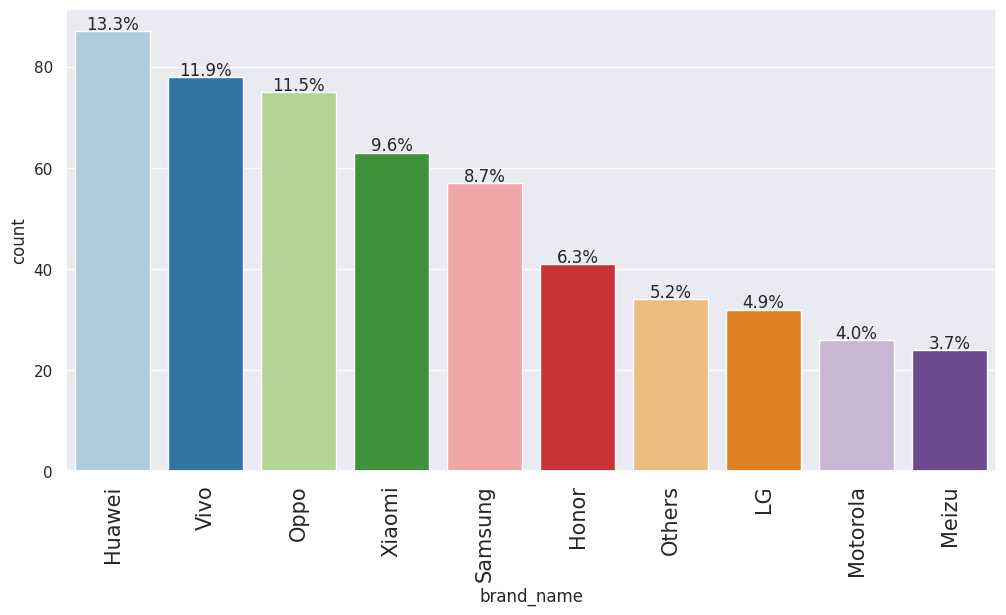

In [36]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10)



*   Huawei, Vivo, and Oppo have the most selfie camera mp.



In [38]:
# main camera
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

<ipython-input-12-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


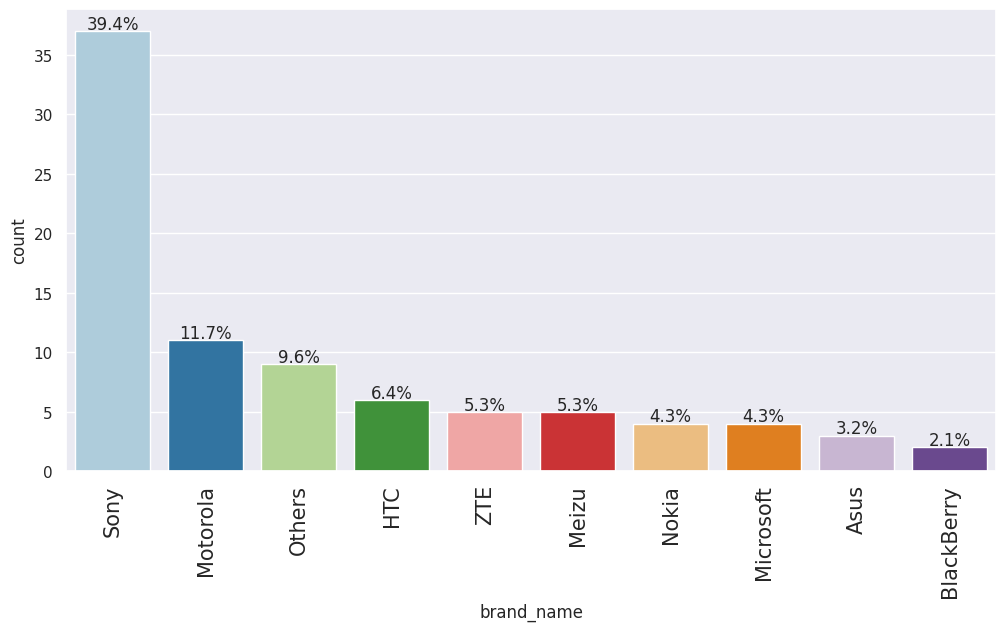

In [39]:
labeled_barplot(df_main_camera, "brand_name", perc=True, n=10)



*   Sony dominates the large main camera mp category in this data.



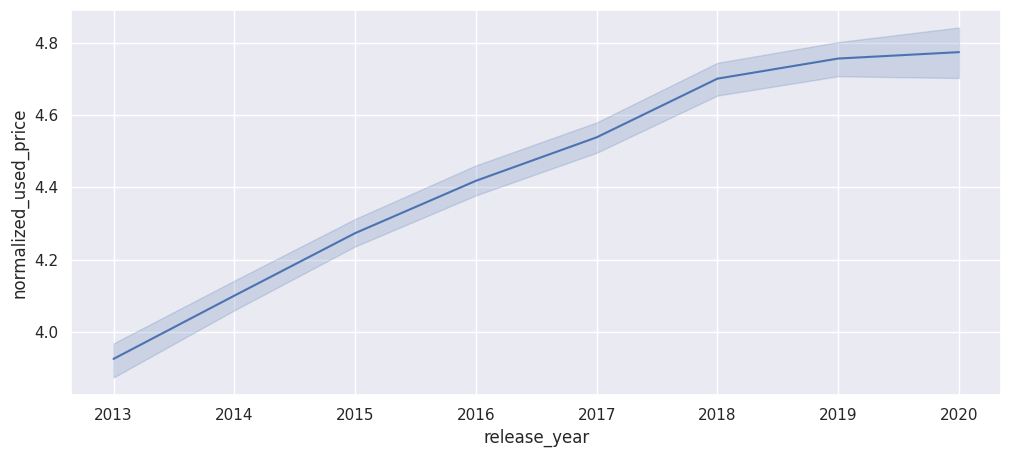

In [41]:
# price by years
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="release_year", y="normalized_used_price")
plt.show()

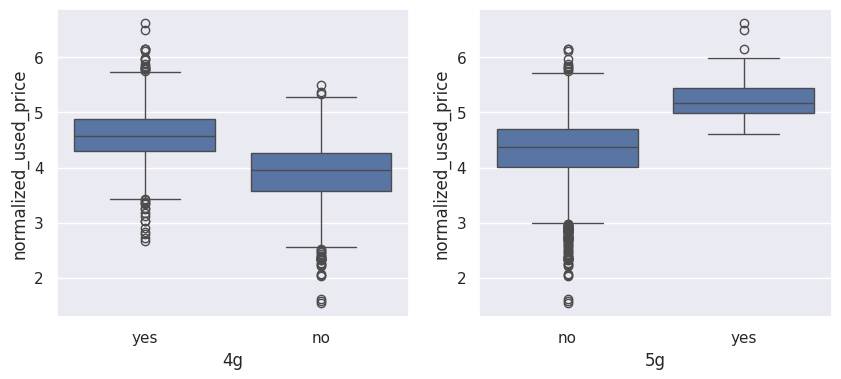

In [42]:
# 4g vs 5g
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()



*   Phones with 5g are more valuable than 4g.



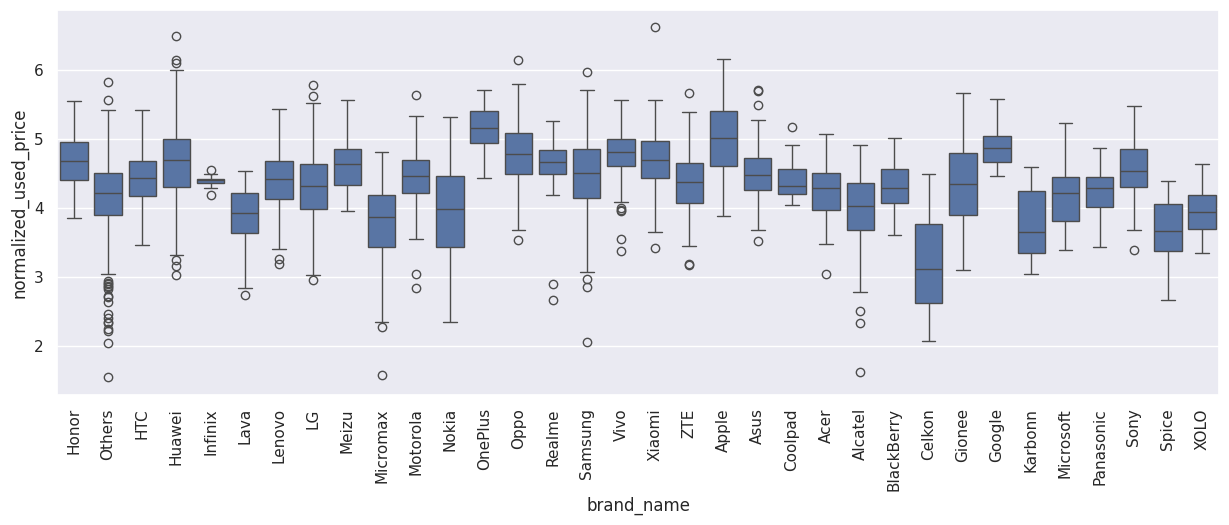

In [120]:
# normalized_used_price and brand_name
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()



*   With a couple exceptions most of the brans are priced between 3.5-5.5.



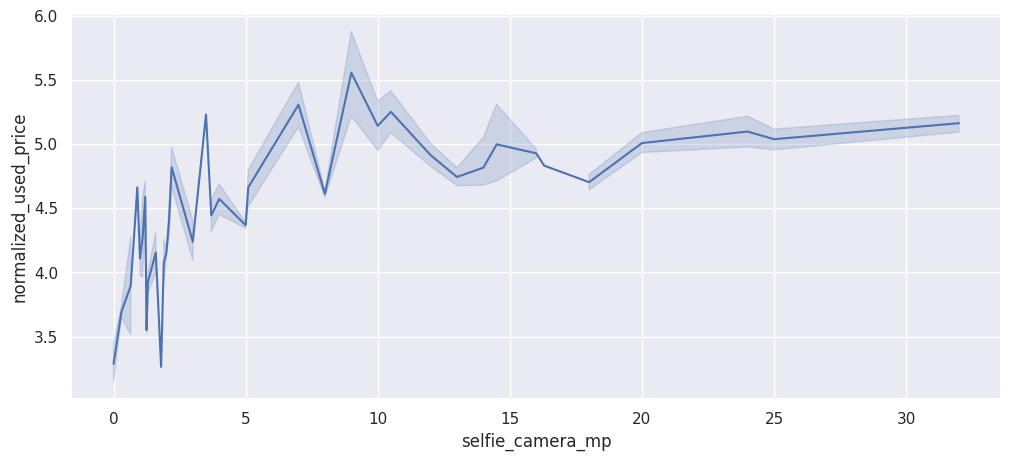

In [122]:
# normalized_used_price and selfie_camera_mp
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="selfie_camera_mp", y="normalized_used_price")
plt.show()



*   As the selfie camera mp increases so does the used price. Until about 9mp, then the price dips a little and almost levels off.



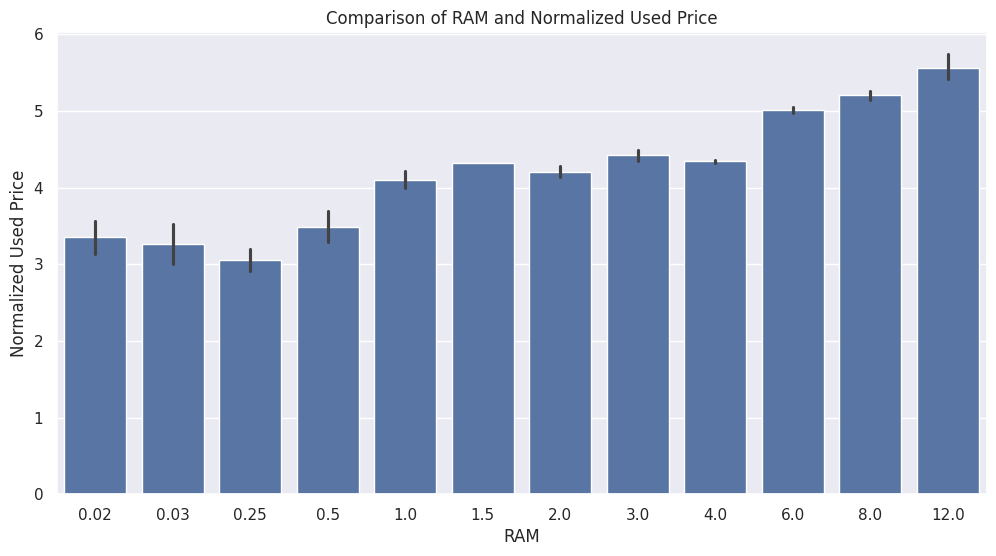

In [130]:
# used price and ram
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="ram", y="normalized_used_price")
plt.xlabel("RAM")
plt.ylabel("Normalized Used Price")
plt.title("Comparison of RAM and Normalized Used Price")
plt.xticks(rotation=0)
plt.show()



*   Significant price jump =>6 ram.



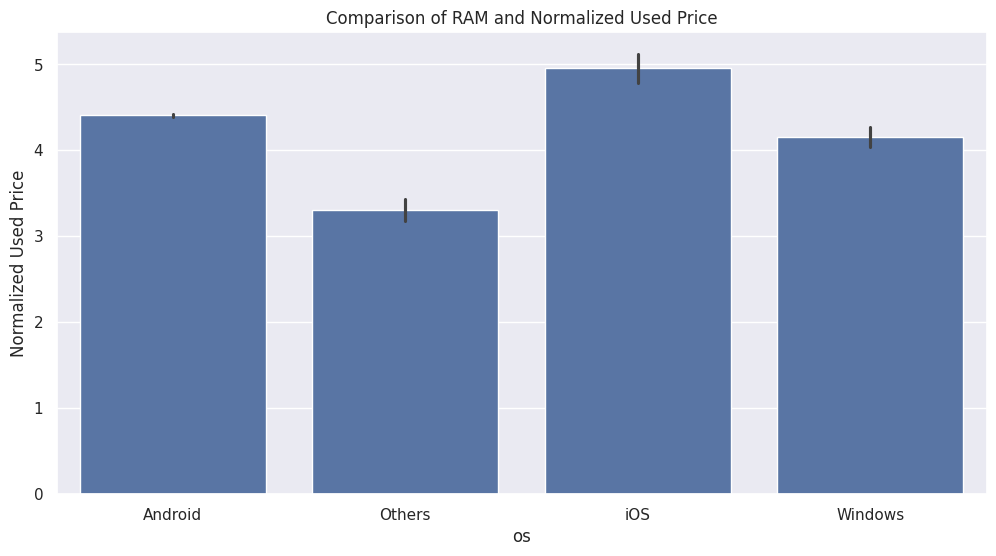

In [131]:
# price vs OS
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="os", y="normalized_used_price")
plt.xlabel("os")
plt.ylabel("Normalized Used Price")
plt.title("Comparison of RAM and Normalized Used Price")
plt.xticks(rotation=0)
plt.show()



*   iOS is the highest price.
*   Android and Windows are a close second.



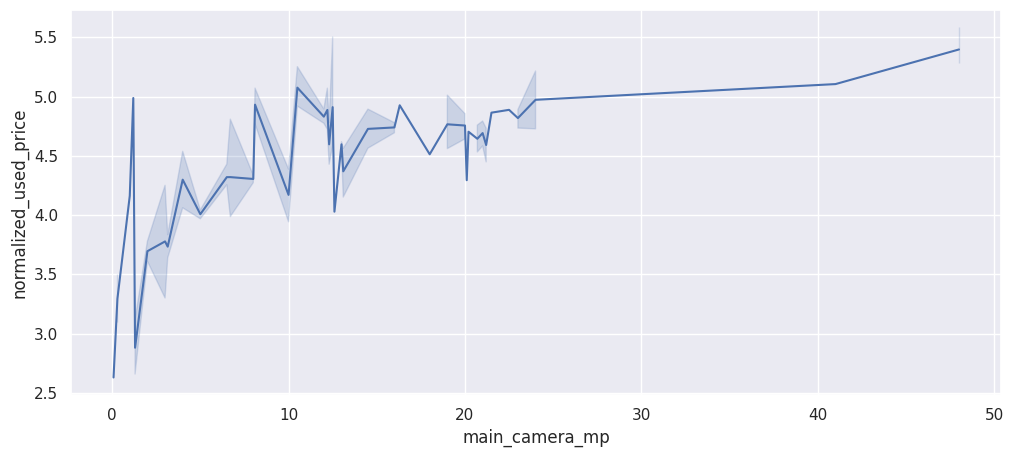

In [132]:
# price vs main camers mp
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="main_camera_mp", y="normalized_used_price")
plt.show()



*   Price increases with size of main camera mp.



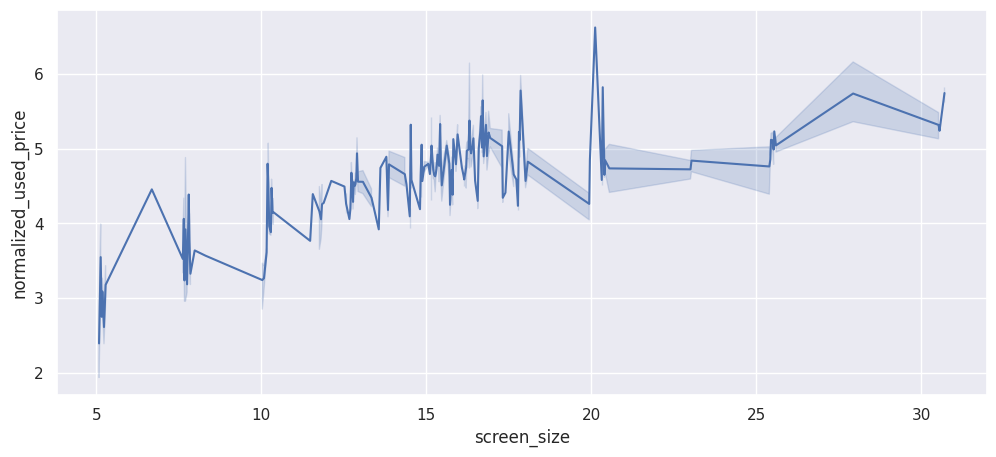

In [133]:
# price vs screen size
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="screen_size", y="normalized_used_price")
plt.show()



*   Price increases with screen size.



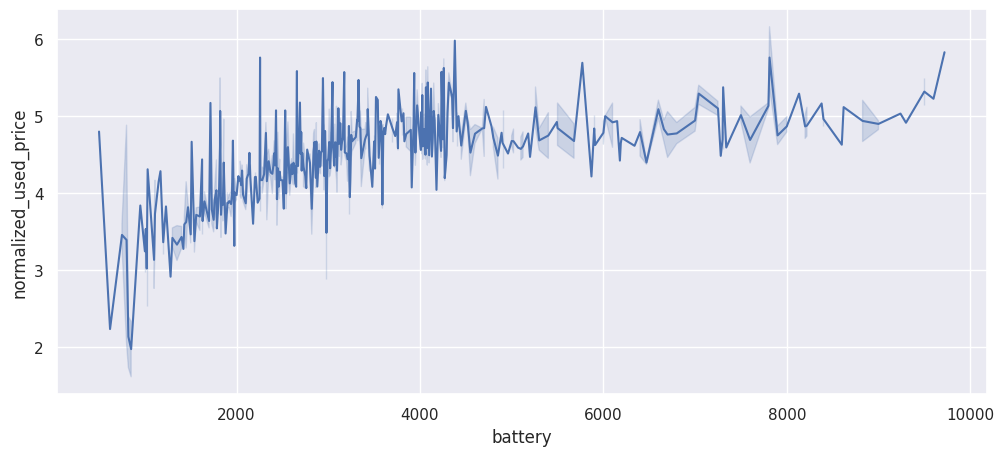

In [135]:
# price vs battery
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="battery", y="normalized_used_price")
plt.show()



*   Price increases with battery.



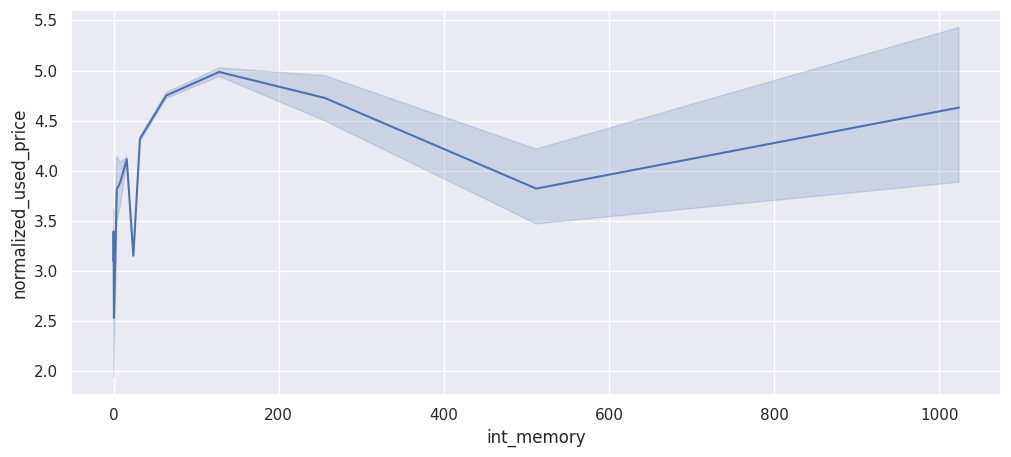

In [136]:
# price vs int memory
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="int_memory", y="normalized_used_price")
plt.show()



*   The price per in_memory peaks at about 180 then decreases. Only some outliers between 800-1000 beat the peak price.



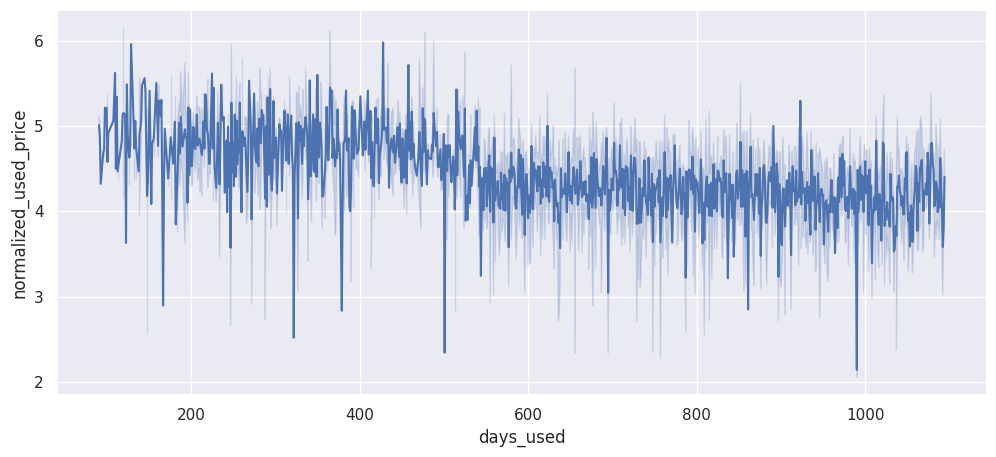

In [137]:
# price vs days used
plt.figure(figsize=(12, 5))
sns.lineplot(df, x="days_used", y="normalized_used_price")
plt.show()



*   The price slowly decreases with the days used but not as much as I would expect.



## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation

In [43]:
# make a copy before imputing
df1 = df.copy()

In [44]:
# check for missing values
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64



*   Group by release_year and brand_name, then impute.



In [45]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )

# checking for missing values
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64



*   Group by brand_name then impute.





In [46]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    )

# checking for missing values
df1.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64



*   Impute remaining missing values in main_camera_mp with median.



In [57]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"]).median

# checking for missing values
df1.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
years_since_release      0
dtype: int64



*   I messed up this code and accidently made all the values in main_camera_mp the median.


*   I will now need to replace that data with the original data.
*   Then run the correct code to fill the missing values with the median.





In [58]:
df1["main_camera_mp"].unique()

array([<bound method NDFrame._add_numeric_operations.<locals>.median of 0       <bound method NDFrame._add_numeric_operations....
       1       <bound method NDFrame._add_numeric_operations....
       2       <bound method NDFrame._add_numeric_operations....
       3       <bound method NDFrame._add_numeric_operations....
       4       <bound method NDFrame._add_numeric_operations....
                                     ...
       3449    <bound method NDFrame._add_numeric_operations....
       3450    <bound method NDFrame._add_numeric_operations....
       3451    <bound method NDFrame._add_numeric_operations....
       3452    <bound method NDFrame._add_numeric_operations....
       3453    <bound method NDFrame._add_numeric_operations....
       Name: main_camera_mp, Length: 3454, dtype: object>                                                                        ],
      dtype=object)

In [59]:
# copy the data from df and replace the data in df1
df1["main_camera_mp"] = df["main_camera_mp"].copy()

In [66]:
# check data
df1["main_camera_mp"].value_counts()

13.00    1035
8.00      755
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
12.50       4
48.00       4
6.50        4
6.70        4
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: main_camera_mp, dtype: int64



*   It looks like that worked, now Ill double check that the missing values are still there.



In [67]:
# check for missing values
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
days_used                  0
normalized_used_price      0
normalized_new_price       0
years_since_release        0
dtype: int64



*   Looks good, now I will correctly impute the missing values with the median.



In [68]:
# first I want to know what the median number is so that I can double check the imputed values after changing the missing values.
# Calculate the median of the "main_camera_mp" column
median_main_camera_mp = df1["main_camera_mp"].median()

# Print the median
print(f"Median of 'main_camera_mp': {median_main_camera_mp}")

Median of 'main_camera_mp': 8.0


In [70]:
# Calculate the median of the "main_camera_mp" column
median_main_camera_mp = df1["main_camera_mp"].median()

# Fill missing values in "main_camera_mp" with the calculated median value
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(median_main_camera_mp)

In [71]:
# checking to make sure it worked value of 8 had a total of 755 and now should have a total of 934
df1["main_camera_mp"].value_counts()

13.00    1035
8.00      934
5.00      546
12.00     189
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
23.00      19
21.00      19
20.70      16
20.00      13
14.50      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
12.50       4
48.00       4
6.50        4
6.70        4
21.20       2
21.50       1
1.20        1
16.30       1
22.60       1
18.00       1
12.60       1
20.10       1
41.00       1
20.20       1
1.00        1
0.08        1
22.50       1
Name: main_camera_mp, dtype: int64



*   Looks good!



In [73]:
# check for missing values
df1.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
years_since_release      0
dtype: int64

## Feature Engeneering



*   Change the relese_year to _years_since_release.


*   I will consider 2021 as the year the data was collected as the baseling.





In [48]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

## Outlier Check



*   Check for outliers.



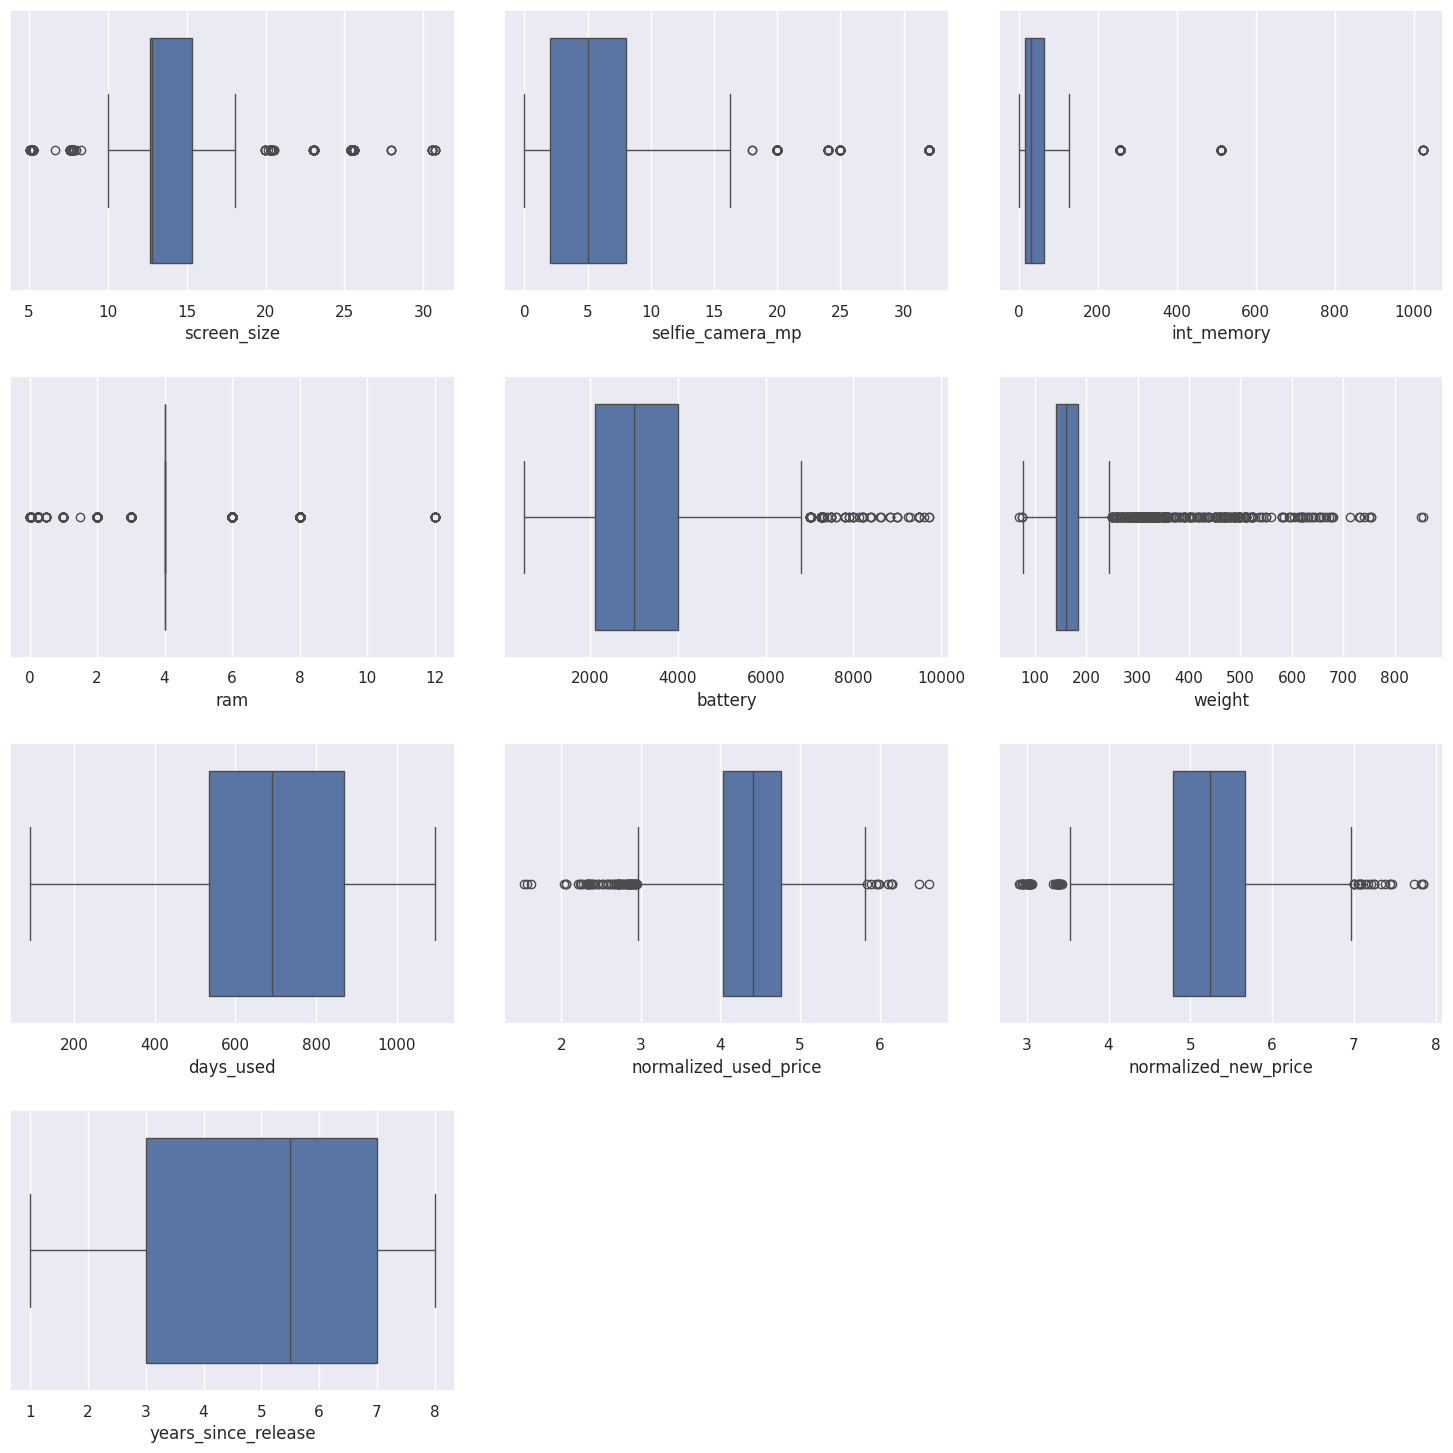

In [49]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()



*   Ram has several outliers.
*   Battery is right-skewed with a lot of right outliers.


*   Weight is heavily right-skewed with a ton of outliers.
*   Days_used doesnt have any outliers.


*   Normalized_used_price has many outliers on both ends.
*   Normalized_new_price has several outliers on both ends.


*   Years_since_release doesnt have any outliers.


*   There are quite a few outliers in the data, however I will not treat them because they are proper values.











## Data Preperation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [74]:
print(df1['main_camera_mp'])

0       13.0
1       13.0
2       13.0
3       13.0
4       13.0
        ... 
3449     8.0
3450    13.0
3451    13.0
3452    13.0
3453    13.0
Name: main_camera_mp, Length: 3454, dtype: float64


In [75]:
## define the x and y variables. normalized_used_price is the target variable.
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [76]:
# let's add the intercept to data
X = sm.add_constant(X)

In [77]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [85]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [86]:
print("Number of rows in train df =", x_train.shape[0])
print("Number of rows in test df =", x_test.shape[0])

Number of rows in train df = 2417
Number of rows in test df = 1037


## Model Building - Linear Regression

In [87]:
# build the model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.6
Date:                   Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                           20:51:46   Log-Likelihood:                 123.24
No. Observations:                   2417   AIC:                            -148.5
Df Residuals:                       2368   BIC:                             135.2
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.845**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3284**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `main_camera_mp` is **0.0203**.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the df and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [90]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dfframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [91]:
# checking model performance on train set (seen 70% df)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229942,0.180446,0.844807,0.841595,4.329829


In [92]:
# checking model performance on test set (seen 30% df)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238148,0.183933,0.842756,0.83495,4.484132


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data

- MAPE of 4.48 on the test df means that we are able to predict within 4.8% of the normalized used price.

## Checking Linear Regression Assumptions

I will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [95]:
# define a function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [96]:
checking_vif(x_train)

,feature,VIF
0,const,228.777446
1,screen_size,7.676784
2,main_camera_mp,2.136878
3,selfie_camera_mp,2.811080
4,int_memory,1.361783
5,ram,2.285130
6,battery,4.072466
7,weight,6.376529
8,days_used,2.669091
9,normalized_new_price,3.122669




*   Apple and iOS have a high multicollinearity


*   The majority of the columns have a low multicollinearity


*   I will systematically drop numerical columns with VIF>5


*   I will ignore the VIF values of dummy variables and the constant intercept






### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [97]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dfframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [98]:
col_list = ["brand_name_apple", "os_iOS"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.841718,0.232267
1,brand_name_apple,0.841662,0.232309


In [100]:
# drop brand_name_apple
col_to_drop = "brand_name_Apple"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,228.316579
1,screen_size,7.643238
2,main_camera_mp,2.135929
3,selfie_camera_mp,2.789551
4,int_memory,1.361766
5,ram,2.276335
6,battery,4.070443
7,weight,6.373996
8,days_used,2.668565
9,normalized_new_price,3.106449




*   This corrected the high VIF
*   Now Ill rebuild the model using the updated set of predictor variables



In [101]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.4
Date:                   Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                           22:14:00   Log-Likelihood:                 123.24
No. Observations:                   2417   AIC:                            -150.5
Df Residuals:                       2369   BIC:                             127.5
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

**Observations**

- We can see that adj. R-squared has not changed, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [102]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [103]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [104]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     917.6
Date:                   Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                           22:55:30   Log-Likelihood:                 105.17
No. Observations:                   2417   AIC:                            -180.3
Df Residuals:                       2402   BIC:                            -93.49
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [105]:
# checking model performance on train set (seen 70% df)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231667,0.181664,0.84247,0.841486,4.357732


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.842, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.842
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now lets check the rest of the assumptions on *olsmod2*.**


1.   Linearity of variables
2.   Independence of error terms
3.   Normality of error terms
4.   No heteroscedasticity





### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [108]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855960,0.231528
1525,4.448399,4.627570,-0.179171
1128,4.315353,4.282023,0.033330
3003,4.282068,4.207447,0.074621
2907,4.456438,4.474197,-0.017759


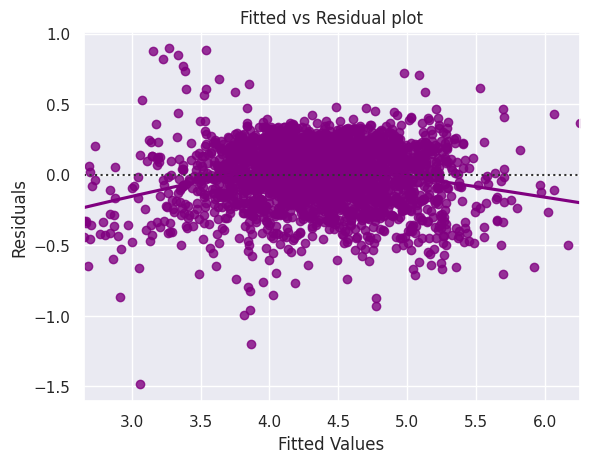

In [110]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the df and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

### TEST FOR NORMALITY

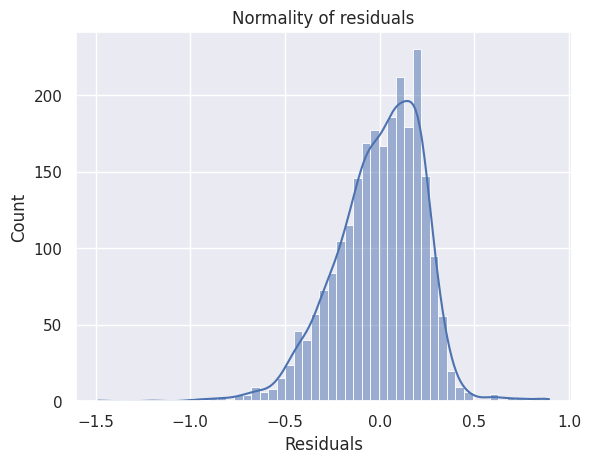

In [111]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

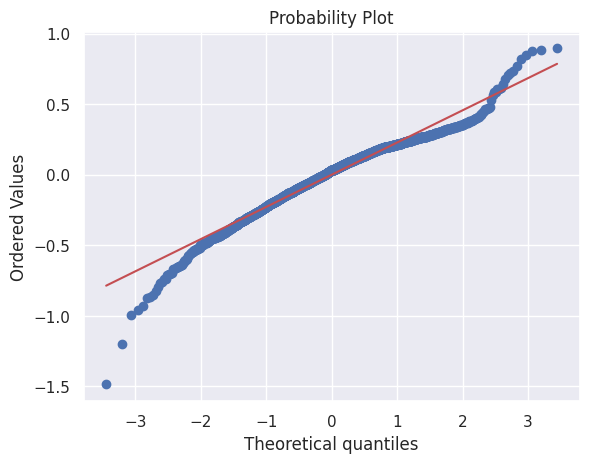

In [112]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [113]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9692338109016418, pvalue=2.38214965500456e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [114]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0495053262675442), ('p-value', 0.20201816331302255)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [115]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.372621
2341,3.696103,3.963885
1913,3.592093,3.691098
688,4.306495,4.113827
650,4.522115,5.142978
2291,4.259294,4.393328
40,4.997685,5.447322
1884,3.875359,4.058517
2538,4.206631,4.050085
45,5.380450,5.293570


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [116]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [117]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     917.6
Date:                   Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                           23:22:03   Log-Likelihood:                 105.17
No. Observations:                   2417   AIC:                            -180.3
Df Residuals:                       2402   BIC:                            -93.49
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [118]:
# checking model performance on train set (seen 70% df)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231667,0.181664,0.84247,0.841486,4.357732


In [119]:
# checking model performance on test set (seen 30% df)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236434,0.182442,0.845012,0.842735,4.44144


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4% of the used phone prices.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1. The model is able to explain ~84% of the variation in the data and within 4% of the used phone prices on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


2. If the screen size increases by one unit, then its used phone price increases by 0.0255 units, all other variables held constant


3. If the main camera mp increases by one unit, then the used phone price increases by 0.0207 units, all other variables held constant


4. If the ram increases by one unit, then its used phone price will increase by 0.0209 units, all other variables held constant


5. For each year since release increases by one unit, the used phone price will decrease by 0.0222, all other variables held constant.


6. The brand of phone doesnt have a much of a impact on the used price.


7. Phones with selfie camera mp around 9mp will provide the best rate of return, all other variables being constant.


8. Ram size => 6 have a large increase in price. Selling more phones at or above 6 ram will increase profitability.


9. Screen size, main camera mp, and battery have a positive correlation to the price. The larger each of those variables are the higher the price will be.


10. Internal memory greater than roughly 180 will likely result in a depreciating return.


11. ReCell should gather data about their users like age, gender, geographical location, occupation, etc. to better understand the kind of phones and features they like.

___

### Convert to HTML

In [139]:
!pip install nbconvert

In [142]:
from nbconvert import HTMLExporter
import nbformat

# Load the Colab notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Fields_P3_V3_.ipynb'  # Replace with your notebook's path
notebook = nbformat.read(notebook_path, as_version=4)

# Create an HTMLExporter instance
html_exporter = HTMLExporter()

# Convert the notebook to HTML
(html, _) = html_exporter.from_notebook_node(notebook)

# Save the HTML to a file
output_file_path = '/content/drive/MyDrive/Google Drive/Documents/Personal/School/UT/UT Post Grad McCombs/Project 3/Fields_P3_V3_.html'  # Replace with your desired output path
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(html)